<h1 align="center">
	Quantum phase estimation
</h1>

**[[Homepage][7]]**
**[[Open with the nbviewer][8]]**

The quantum phase estimation (QPE, also known as PEA) algorithm is a quantum algorithm for estimating the phase of an eigenvector of a unitary operator [[1]]. One of the main applications of the algorithm is to estimate eigenvalues (energies) of some molecule's $\hat{H}$ Hamiltonian [[2]]. Also, phase estimation is frequently used as a subroutine in other quantum algorithms, such as Shor's algorithm and the quantum algorithm for linear systems of equations (HHL algorithm) [[1]]. 

The goal of the algorithm is to estimate the eigenvalue of a given Hamiltonian $\hat{H}$. We exponentiate it and obtain $U = e^{i\hat{H}t}$ unitary operator, where $t$ is some parameter (in our example $t = 1$). Then we apply quantum circuit that corresponds to $U = e^{i\hat{H}t}$ on one of the eigenvectors of the $\hat{H}$. For simplicity, we will take such $\hat{H}$, which eigenvectors will be the computational basis states $\left| 0 \right\rangle$ and $\left| 1 \right\rangle$. For that purpose $\hat{H}$ should be a diagonal matrix). In our example, we will try to find eigenvalue that corresponds to $\left| 1 \right\rangle$ eigenvector. More mathematically:

\begin{align}
\hat{H} = \begin{pmatrix}
E_1 & 0\\
0 & E_2
\end{pmatrix} \longrightarrow
e^{i\hat{H}t} = \begin{pmatrix}
e^{i E_1 t} & 0\\
0 & e^{i E_2 t} 
\end{pmatrix} \longrightarrow e^{i H t} \left| 1 \right\rangle = e^{i E_2 t} \left| 1 \right\rangle = e^{i 2 \pi \varphi_2} \left| 1 \right\rangle,
\end{align}

where $E_1$ and $E_2$ are the eigenvalues of the $\hat{H}$, $\varphi_2 = \frac{E_2 t}{2 \pi}$ is the phase that the algorithm is capable to estimate. Note that $U = e^{i H t}$ is a unitary operator and in the code, we will name it as ```unitary```. For simplicity, we are considering here diagonal Hermitian operator $\hat{H}$. In general case, it is not diagonal.

The code and the algorithm is similar to the our covered [IQPE][5] tutorial. IQPE actually is a modification of QPE algorithm. So, that's why some parts/explanations are omitted here and more details are provided about the parts of QPE that are different from IQPE.

In the first code, all necessary packages are imported.

 [1]: https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm
 [2]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
 [3]: https://en.wikipedia.org/wiki/Quantum_Fourier_transform
 [4]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
 [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
 [6]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/Hamiltonian_simulation.ipynb
 [7]: https://github.com/DavitKhach/quantum-algorithms-tutorials
 [8]: https://nbviewer.jupyter.org/github/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_phase_estimation.ipynb

In [1]:
import numpy as np

from random import random
from qiskit import *
from qiskit.aqua.utils.controlled_circuit import get_controlled_circuit

In the following code the quantum ```circuit``` is created with 
* $q$ quantum state register, where we encode the $\left| 1 \right\rangle$ eigenvector by applying ```x``` gate.

* $a$ ancillary quantum register, where, in the course of the algorithm, the bits of the phase $\varphi_2$ will be stored.

* $c$ classical register, where the measurement results will be stored.

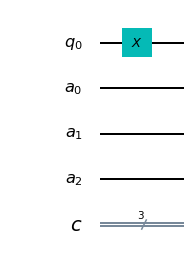

In [2]:
num_bits_estimate = 3
# For 2x2 matrix one qubit is enough
q = QuantumRegister(1, name="q")
# In QPE we use n ancillas to estimate n bits from the phase
a = QuantumRegister(num_bits_estimate, name="a") 
# For n ancillary qubit measurment we need n cllasical bits
c = ClassicalRegister(num_bits_estimate, name="c") 

# Create a quantum circuit
circuit = QuantumCircuit(q, a, c)

# |1> eigenstate initialization
circuit.x(q[0])
circuit.draw('mpl')

The creation of the circuit for $e^{i\hat{H}t}$ unitary evolution for a random diagonal Hermitian operator $\hat{H}$ is presented in the code below:

We are going to estimate E_2 via QPE algorithm 
E_2 = 2.897941946450082


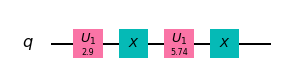

In [3]:
E_1, E_2 = (2 * np.pi * random(), 2 * np.pi * random())
print("We are going to estimate E_2 via QPE algorithm \nE_2 = {}".format(E_2))

# circuit for unitary operator exp(iHt)
t = 1
unitary = QuantumCircuit(q)

unitary.u1(E_2 * t, q[0]) # q[0] is the only qubit in q register
unitary.x(q[0])
unitary.u1(E_1 * t, q[0])
unitary.x(q[0])
unitary.draw('mpl')

For more complex Hamiltonians the circuit for $e^{i\hat{H}t}$ can be created with the technique described in the [Hamiltonian simulation][6] tutorial. Here we prepare the ancillary qubits by applying Hadamard gates to all of them:

 [1]: https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm
 [2]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
 [3]: https://en.wikipedia.org/wiki/Quantum_Fourier_transform
 [4]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
 [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
 [6]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/Hamiltonian_simulation.ipynb

In [4]:
for ancillary in a:
    circuit.h(ancillary)

The quantum state of ancillary qubits before Hadamard gates (in the text we will examine 5 ancillary qubit case, but in the code we will use 10 ancillary qubits for better results):

\begin{align*}
\left| \psi_a \right\rangle = \left| 00000 \right\rangle = \left| 0 \right\rangle \left| 0 \right\rangle \left| 0 \right\rangle \left| 0 \right\rangle \left| 0 \right\rangle
\end{align*}

The quantum state of ancillary qubits after Hadamard gates:

\begin{align*}
\left| \psi_a \right\rangle &= \frac{1}{2^{5/2}}
\left(\left| 0 \right\rangle + \left| 1 \right\rangle \right)
\left(\left| 0 \right\rangle + \left| 1 \right\rangle \right)
\left(\left| 0 \right\rangle + \left| 1 \right\rangle \right)
\left(\left| 0 \right\rangle + \left| 1 \right\rangle \right)
\left(\left| 0 \right\rangle + \left| 1 \right\rangle \right) = 
\\
&= \left| + \right\rangle \left| + \right\rangle \left| + \right\rangle \left| + \right\rangle \left| + \right\rangle
=\left| +++++ \right\rangle ,
\end{align*}

because $H \left| 0 \right\rangle = \frac{1}{\sqrt{2}}
\left(\left| 0 \right\rangle + \left| 1 \right\rangle \right) = \left| + \right\rangle$. Please don't confuse Hadamard gate $H$ with Hermitian operator $\hat{H}$, because we use the same letter for both of them.

For general case we will represent $\varphi$ in its fractional binary representation:

\begin{align*}
\varphi = 0.\varphi_0 \varphi_1 \varphi_2 \varphi_3... =  \frac{\varphi_0}{2} + \frac{\varphi_1}{2^2} + \frac{\varphi_2}{2^3} + \frac{\varphi_3}{2^4} + ...,
\end{align*}

where each $\varphi_k$ is a bit (it is equal to $0$ or $1$).

Now, for each $n$th ancillary qubit, we apply the controlled version of the circuit of $U = e^{i \hat{H} t}$ $2^{n}$ times ($U^{2^{n}}$) to $q$ quantum register controlled by $n$th ancillary qubit ($n$ starts from $0$ to $4$). Here is the circuit so far:

<img src="figures/qpe_control_5ancillary.png" alt="drawing" width="300"/>

This will give us a quantum state for ancillary qubits:

\begin{align*}
\left| \psi_a \right\rangle = \frac{1}{2^{5/2}}
&\left(\left| 0 \right\rangle + e^{i 2 \pi \varphi} \left| 1 \right\rangle \right)
\left(\left| 0 \right\rangle + e^{i 2 \pi 2\varphi} \left| 1 \right\rangle \right)
\\
&\left(\left| 0 \right\rangle + e^{i 2 \pi 4\varphi} \left| 1 \right\rangle \right)
\left(\left| 0 \right\rangle + e^{i 2 \pi 8\varphi} \left| 1 \right\rangle \right)
\left(\left| 0 \right\rangle + e^{i 2 \pi 16\varphi} \left| 1 \right\rangle \right).
\end{align*}

By taking into account the fractional binary representation of $\varphi$:

\begin{align*}
\left| \psi_a \right\rangle = \frac{1}{2^{5/2}}
&\left(\left| 0 \right\rangle + e^{i 2 \pi 0.\varphi_0 \varphi_1 \varphi_2 \varphi_3 \varphi_4} \left| 1 \right\rangle \right)
\left(\left| 0 \right\rangle + e^{i 2 \pi 0.\varphi_1 \varphi_2 \varphi_3 \varphi_4} \left| 1 \right\rangle \right) 
\\
&\left(\left| 0 \right\rangle + e^{i 2 \pi 0.\varphi_2 \varphi_3 \varphi_4} \left| 1 \right\rangle \right)
\left(\left| 0 \right\rangle + e^{i 2 \pi 0.\varphi_3 \varphi_4} \left| 1 \right\rangle \right)
\left(\left| 0 \right\rangle + e^{i 2 \pi 0.\varphi_4} \left| 1 \right\rangle \right)
\end{align*}.

Here is the code for the controlled $U^{2^{n}}$:

In [5]:
for n in range(a.size):
    for m in range(2**n):
        get_controlled_circuit(unitary, a[n], circuit)

At the next step, we will apply a Hadamard gate to the last $n = 5$ qubit and controlled $u1 \left( -\frac{2 \pi}{2^{(n - m + 1)}} \right)$ gates from $n$th qubit to the rest $m < n$ qubits. Here is the $u1$ gate:

$$
u1(\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i\lambda}.
\end{pmatrix}
$$

This will give us a quantum state: 

\begin{align*}
\left| \psi_a \right\rangle = \frac{1}{2^{5/2}}
&\left(\left| 0 \right\rangle + e^{i 2 \pi 0.\varphi_0 \varphi_1 \varphi_2 \varphi_3} \left| 1 \right\rangle \right)
\left(\left| 0 \right\rangle + e^{i 2 \pi 0.\varphi_1 \varphi_2 \varphi_3} \left| 1 \right\rangle \right) \\
&\left(\left| 0 \right\rangle + e^{i 2 \pi 0.\varphi_2 \varphi_3} \left| 1 \right\rangle \right)
\left(\left| 0 \right\rangle + e^{i 2 \pi 0.\varphi_3} \left| 1 \right\rangle \right)
\left| \varphi_4 \right\rangle.
\end{align*}

Here we take into account that when $\varphi_4 = 0$ the state of the $5$th qubit is equal to $\left| + \right\rangle$ state and when $\varphi_4 = 1$ it equal to $\left| - \right\rangle = \frac{1}{\sqrt{2}}\left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) $ state. Also note that when we apply Hadamard gate on $5$th qubit, it will give us either

\begin{align*}
H \left| + \right\rangle= \left| 0 \right\rangle
\qquad \text{ or } \qquad
H \left| - \right\rangle = \left| 1 \right\rangle
\end{align*}

We repeat this procedure for all qubits and at the end, the quantum state will look like: 

\begin{align*}
\left| \psi_a \right\rangle=
\left| \varphi_0 \right\rangle
\left| \varphi_1 \right\rangle
\left| \varphi_2 \right\rangle
\left| \varphi_3 \right\rangle
\left| \varphi_4 \right\rangle.
\end{align*}

So, by measuring each qubit we will obtain all bits of the phase. This part of the algorithm is the well-known inverse Quantum Fourier transform (inverse QFT) [[3]] without SWAP gates. Here is the code that adds this part of the algorithm:

 [1]: https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm
 [2]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
 [3]: https://en.wikipedia.org/wiki/Quantum_Fourier_transform
 [4]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
 [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
 [6]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/Hamiltonian_simulation.ipynb

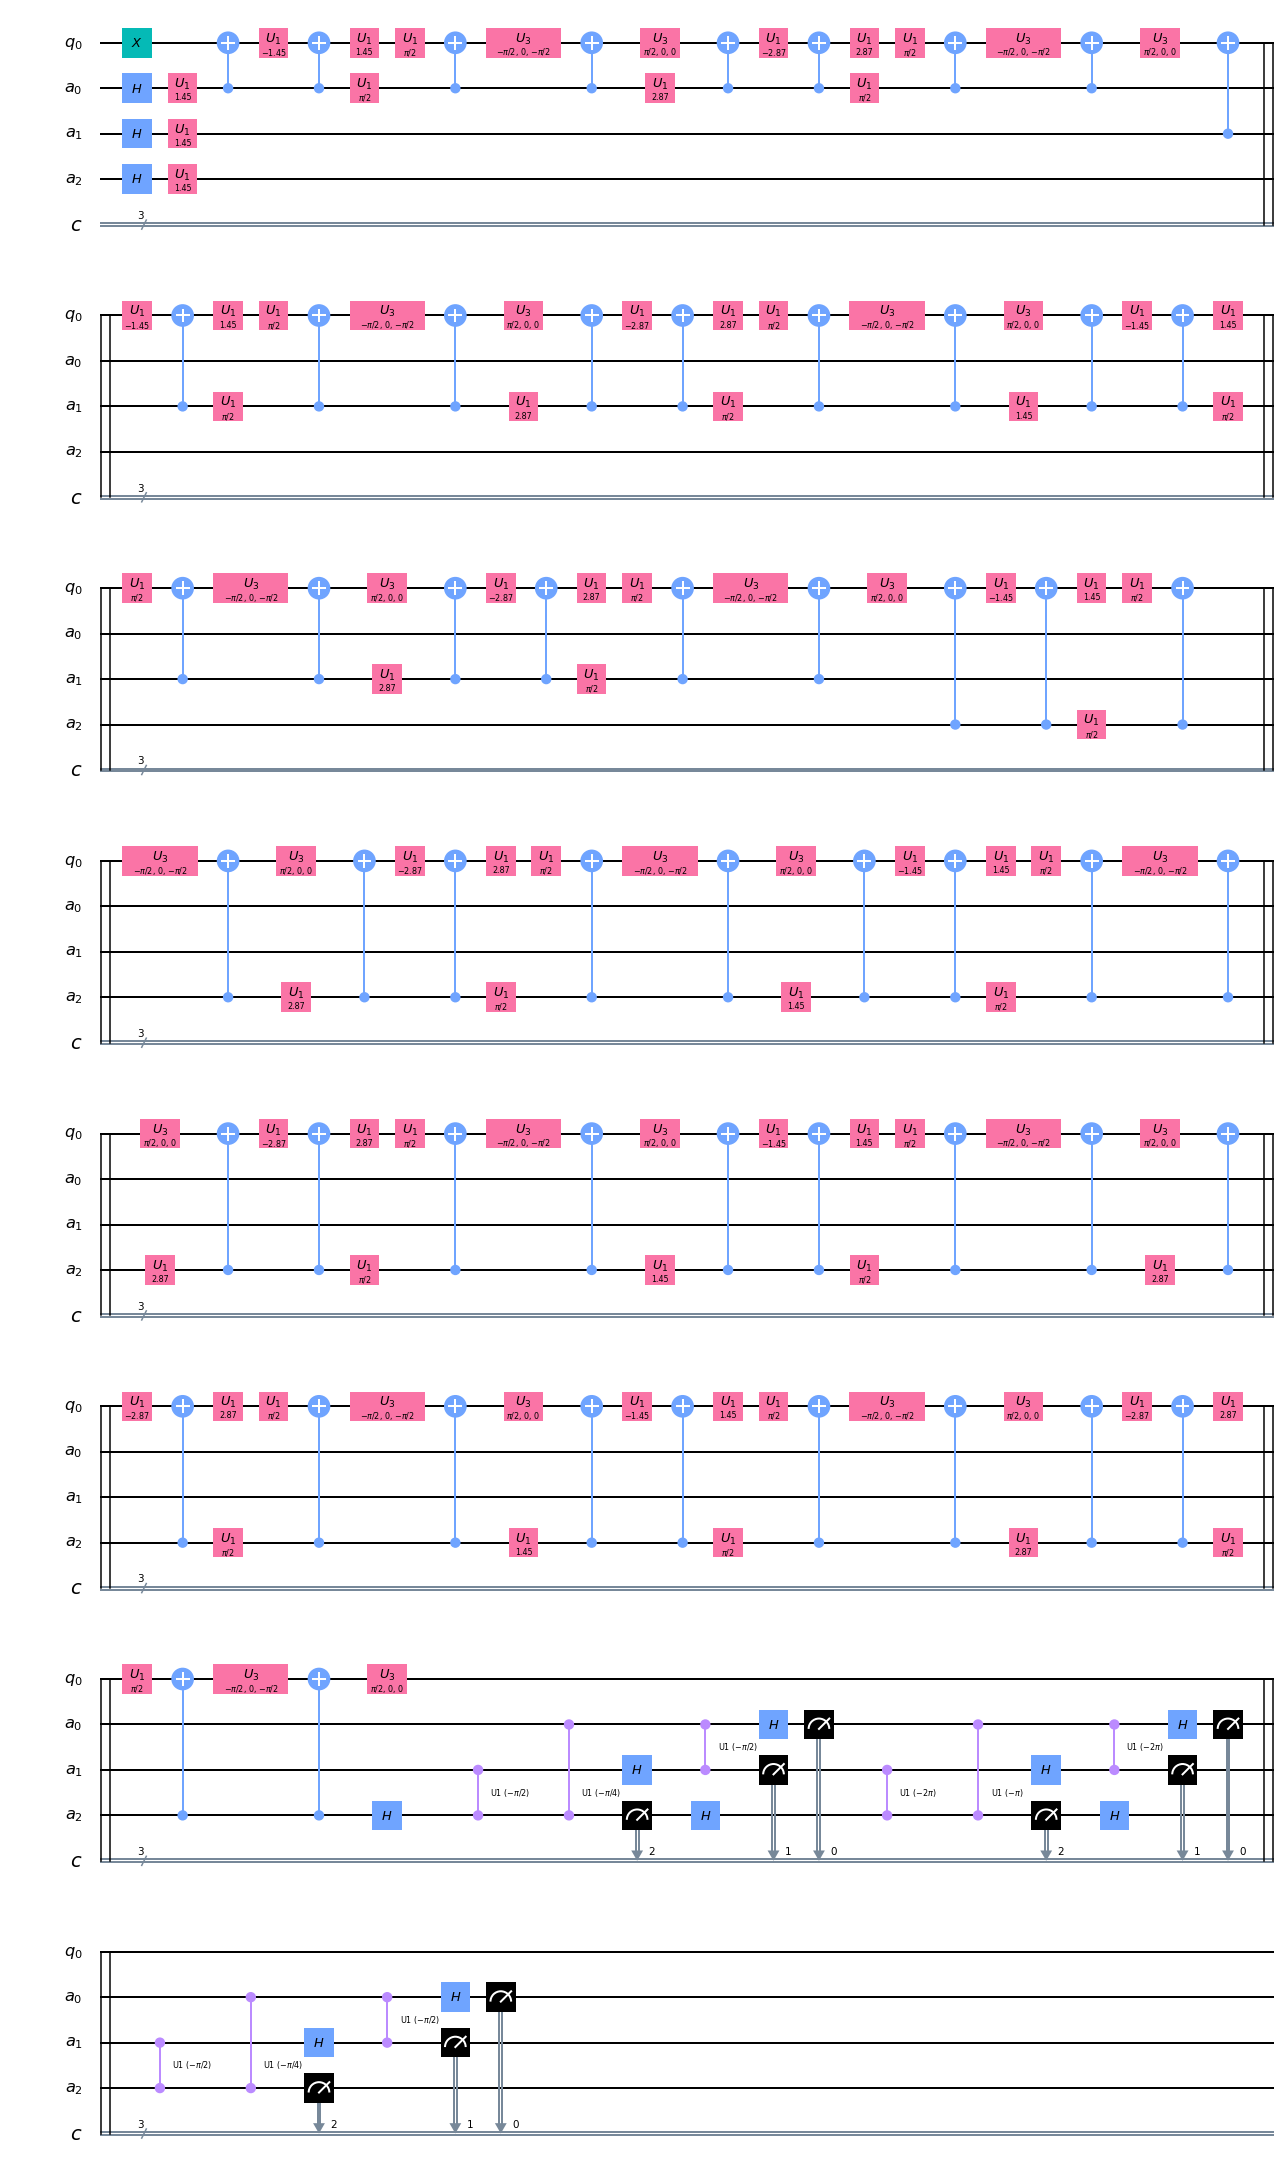

In [10]:
# inverse QFT without SWAP gates
for n in reversed(range(a.size)):
    circuit.h(a[n])
    if n != 0:
        for m in reversed(range(n)):
            angle = -2*np.pi / (2**(n - m + 1))
            circuit.cu1(angle, a[n], a[m])

# measurements on the ancillary qubits stored in c classical register
for n in reversed(range(a.size)):
    circuit.measure(a[n],c[n])
circuit.draw('mpl')

The quantum circuit that corresponds to the whole algorithm looks like this (here we draw a circuit that has only 4 ancillary qubits):

<img src="figures/qpe_circuit_4ancillary.png" alt="drawing" width="800"/>

At the final piece of code, we run the algorithm on the QC simulator and store measurement results (bits of phase) in $c$ classical register that gives us the estimated value for the phase. After it, by remembering that $E_2 = \frac{2 \pi \varphi_2}{t}$, we obtain desired $E_2$ eigenvalue of the $\hat{H}$ Hamiltonian:

In [11]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024  # how many time execute the algorithm
job = execute(circuit, backend, shots=shots)
result = job.result()
counts = result.get_counts()

phase_bits = max(counts, key=counts.get) # take the most often obtaned result

phase = 0
for index, bit in enumerate(reversed(phase_bits)):
    phase += int(bit) / 2**(index + 1)
    
estimated_E_2 = 2 * np.pi * phase / t

print("Eigenvalue of the Hamiltonian: {}".format(E_2))
print("Estimated eigenvalue of the Hamiltonian: {}".format(estimated_E_2))

Eigenvalue of the Hamiltonian: 2.897941946450082
Estimated eigenvalue of the Hamiltonian: 1.5707963267948966


**Final notes**: Here we didn't implement classical textbook version of QPE algorithm. In the textbook [[4]] the algorithm is done via inverse QFT with SWAP gates. If we want to implement the algorithm with inverse QFT, the code should be changed a little bit. Firstly, the order of control ```unitary``` gates should be changed: $i$th ancillary should control $U^{2^{(n - i - 1)}}$ gate on $q$ register. Secondly, SWAP gates are added after controlled unitaries of the algorithm in order to obtain inverse QFT. Here is the textbook [[4]] implementation of the algorithm:

<img src="figures/textbook_qpe.png" alt="drawing" width="800"/>

where the inverse QFT is the following part of the circuit:

<img src="figures/inverse_QFT.png" alt="drawing" width="800"/>

But we did the algorithm's job without SWAP gates. Actually, the SWAP gates don't add anything to this algorithm and we can omit them. Not only they increase the gate number of the circuit, but also they add errors. So, that is why we are avoiding SWAP gates in our implementation.

They are some details about Trotterization, the $t$ parameter in the $U = e^{iHt}$, what should we do when the eigenvalue is negative that we don't cover here. If you interested in these topics you can check our [IQPE][5] tutorial, that is a modification of QPE algorithm. There are two main differences between QPE and IQPE algorithms. QPE demands $n$ ancillary qubits for $n$ bit phase estimation, IQPE demands only one ancillary qubit for any $n$ bit phase estimation. The second difference is that QPE applies inverse QFT, meanwhile, IQPE applies inverse QFT iteratively ($u1$ gates are applied iteratively).

 [1]: https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm
 [2]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
 [3]: https://en.wikipedia.org/wiki/Quantum_Fourier_transform
 [4]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
 [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
 [6]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/Hamiltonian_simulation.ipynb

**[[Homepage][7]]**

<h3 align="left">
References
</h3>


[[1]] [Quantum phase estimation algorithm (wiki)][1]

[[2]] [J.D. Whitfield,  J. Biamonte  and  A. Aspuru-Guzik,
Molecular Physics, "Simulation of electronic structure Hamiltonians using
quantum computers" (2011)][2]

[[3]] [Quantum Fourier transform (wiki)][3]

[[4]] [M.A. Nielsen, I.L. Chuang, Cambridge University Press New York, "Quantum Computation and Quantum Information: 10th Anniversary Edition
10th" (2011)][4]

 [1]: https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm
 [2]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
 [3]: https://en.wikipedia.org/wiki/Quantum_Fourier_transform
 [4]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
 [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
 [6]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/Hamiltonian_simulation.ipynb
 [7]: https://github.com/DavitKhach/quantum-algorithms-tutorials
 [8]: https://nbviewer.jupyter.org/github/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_phase_estimation.ipynb